# 9 Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis




In [2]:
# import necessary file and drop osm that won't be used for clustering.
road_df = pd.read_csv('../data/3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
road_df = road_df.drop(['osm'], axis=1).sample(2000)

# describe dataframe.
print(road_df.describe())
print()

# check for missing values.
missing_data = road_df.isna().sum()
print(missing_data)
print()

# check column dtypes annd verify correct dtypes.
print(road_df.dtypes)

               lat          lon          alt
count  2000.000000  2000.000000  2000.000000
mean      9.738332    57.091143    21.906253
std       0.631110     0.289266    18.222317
min       8.146658    56.583746    -1.008307
25%       9.333164    56.859586     6.962991
50%       9.889718    57.047835    17.788992
75%      10.185284    57.318931    31.066453
max      11.196181    57.739892    99.483528

lat    0
lon    0
alt    0
dtype: int64

lat    float64
lon    float64
alt    float64
dtype: object


In [3]:
# scale all values for clustering.
scaler = StandardScaler()
scaled_values = scaler.fit_transform(road_df)
scaled_df = pd.DataFrame(scaled_values)
scaled_df.columns = ['lat','lon','alt']
print(scaled_df.head())

        lat       lon       alt
0  0.194917  1.134797 -0.020862
1  1.218590  1.168535 -0.386648
2  0.343548  1.596188  0.569756
3 -2.322370 -1.729242 -1.151099
4  0.733573 -0.392915 -1.047892


In [4]:
eps = .05
generated_values = []
s_scores = []
packed_list = []

while eps < 0.5:
    for i in range(1,11):
        
        # create dbscan object and cluster samples together.
        dbscan = DBSCAN(eps=eps, min_samples=i)
        scaled_df['cluster'] = dbscan.fit_predict(scaled_df[['lat','lon', 'alt']])
        
        # append generated_values with each df to plot later.
        generated_values.append(scaled_df)
        #print(scaled_df.describe())
        sil_scores = metrics.silhouette_score(scaled_df[['lon', 'lat', 'alt']], scaled_df.cluster)
        s_scores.append(sil_scores)
        packed_list.append([i,eps,sil_scores])

    #update eps score for the loop to move onto the next iteration.
    eps+=.01
    
scores_array = np.array(packed_list)


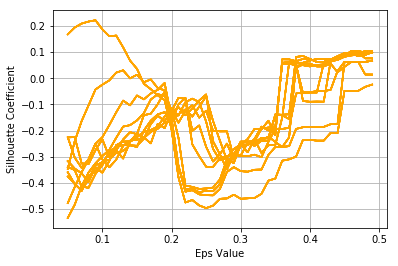

In [5]:
y = scores_array[:,2].reshape(-1,10).T
x = scores_array[:,1].reshape(-1,10).T
for row in y:
    for num in x:
        plt.plot(num, row, c = 'orange')
        plt.xlabel('Eps Value')
        plt.ylabel('Silhouette Coefficient')
        plt.grid(True)
    


## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data. If your data is labeled already, with a class that you are attempting to predict, be sure to not use it in fitting/training/predicting. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D and 3D plots. 

For bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot
- Plots of the clustered data

# Outline for Answers
## 1. Cleaning data
## 2. KMeans Clustering w/ Graphing & Metric Eval
## 3. DBSCAN Clustering w/Graphing & Metric Eval
## 4. PCA



## Data Cleaning

In [6]:
beers_df = pd.read_csv('../data/beers.csv', na_values=['', ' ','nan'])

# inspect the data.
beers_df = beers_df.drop(['Unnamed: 0'], axis = 1)
print(beers_df.head(),'\n')
print(beers_df.describe(), '\n')
print(beers_df.isna().sum(),'\n')
print(beers_df.dtypes)



     abv  ibu    id                 name                           style  \
0  0.050  NaN  1436             Pub Beer             American Pale Lager   
1  0.066  NaN  2265          Devil's Cup         American Pale Ale (APA)   
2  0.071  NaN  2264  Rise of the Phoenix                    American IPA   
3  0.090  NaN  2263             Sinister  American Double / Imperial IPA   
4  0.075  NaN  2262        Sex and Candy                    American IPA   

   brewery_id  ounces  
0         408    12.0  
1         177    12.0  
2         177    12.0  
3         177    12.0  
4         177    12.0   

               abv          ibu           id   brewery_id       ounces
count  2348.000000  1405.000000  2410.000000  2410.000000  2410.000000
mean      0.059773    42.713167  1431.113278   231.749793    13.592241
std       0.013542    25.954066   752.459975   157.685604     2.352204
min       0.001000     4.000000     1.000000     0.000000     8.400000
25%       0.050000    21.000000   808.2500

In [7]:
# fill in missing values and drop the rest that aren't filled to improve model. 
#beers_df['ibu'] = beers_df['ibu'].replace('nan', np.nan, inplace = True)
beers_df['ibu'] = beers_df['ibu'].fillna(beers_df.groupby('style')['ibu'].transform('mean'))
beers_df['abv'] = beers_df['abv'].fillna(beers_df.groupby('style')['abv'].transform('mean'))
beers_df = beers_df.dropna(axis=0)

beers_df.isna().sum(), beers_df.describe()



(abv           0
 ibu           0
 id            0
 name          0
 style         0
 brewery_id    0
 ounces        0
 dtype: int64,
                abv          ibu           id   brewery_id       ounces
 count  2353.000000  2353.000000  2353.000000  2353.000000  2353.000000
 mean      0.059731    40.900492  1426.521037   230.332342    13.564853
 std       0.013443    23.851880   756.589326   157.789185     2.316091
 min       0.027000     4.000000     1.000000     0.000000     8.400000
 25%       0.050000    22.000000   796.000000    91.000000    12.000000
 50%       0.056000    34.125000  1451.000000   204.000000    12.000000
 75%       0.067000    60.000000  2075.000000   365.000000    16.000000
 max       0.128000   138.000000  2692.000000   557.000000    32.000000)

In [8]:
# convert categorical data to numerical for later confirmation.
enc = OneHotEncoder()
label_encoder = LabelEncoder()
beer_style = beers_df['style']
beers_df['target_styles'] = label_encoder.fit_transform(beer_style)
beers_df.head()

,abv,ibu,id,name,style,brewery_id,ounces,target_styles
0,0.050,26.750000,1436,Pub Beer,American Pale Lager,408,12.0,16
1,0.066,44.941176,2265,Devil's Cup,American Pale Ale (APA),177,12.0,15
2,0.071,67.634551,2264,Rise of the Phoenix,American IPA,177,12.0,13
3,0.090,93.320000,2263,Sinister,American Double / Imperial IPA,177,12.0,10
4,0.075,67.634551,2262,Sex and Candy,American IPA,177,12.0,13


In [9]:
# extract numerical data for clustering
numerical_df = beers_df.select_dtypes(['int64','float64']).copy()
numerical_df.head()

,abv,ibu,id,brewery_id,ounces,target_styles
0,0.050,26.750000,1436,408,12.0,16
1,0.066,44.941176,2265,177,12.0,15
2,0.071,67.634551,2264,177,12.0,13
3,0.090,93.320000,2263,177,12.0,10
4,0.075,67.634551,2262,177,12.0,13


In [10]:
# get unique count for each of beer to check with results.
unique_beer_type = len(numerical_df.target_styles.unique())
print(f'Unique types of beers: {unique_beer_type}')

Unique types of beers: 90


In [11]:
# create features df.
features = numerical_df.drop(['target_styles','brewery_id','id'], axis = 1).copy()
print(features)
# create 2d np array for classification features.
beer_labels = numerical_df.target_styles

# create 1d np array of label converted style of beer.

        abv        ibu  ounces
0     0.050  26.750000    12.0
1     0.066  44.941176    12.0
2     0.071  67.634551    12.0
3     0.090  93.320000    12.0
4     0.075  67.634551    12.0
...     ...        ...     ...
2405  0.067  45.000000    12.0
2406  0.052  36.298701    12.0
2407  0.055  31.000000    12.0
2408  0.055  40.000000    12.0
2409  0.052  36.298701    12.0

[2353 rows x 3 columns]


## KMeans Clustering

In [12]:
# get kmeans clusters.
km = KMeans()
km.fit(features)
beer_clusters = km.predict(features)
numerical_df['cluster'] = beer_clusters.copy()

In [13]:
counts = np.bincount(numerical_df.cluster)
ii = np.nonzero(counts)[0]
np.vstack((ii,counts[ii])).T

array([[  0, 612],
       [  1, 345],
       [  2, 177],
       [  3,  58],
       [  4, 443],
       [  5, 301],
       [  6, 284],
       [  7, 133]])

## KMeans Metric Evaluation

In [14]:
from sklearn import metrics
metrics.homogeneity_score(beer_labels, beer_clusters)

0.27540498871449065

## KMeans Clustering and Graphing in 2D and 3D

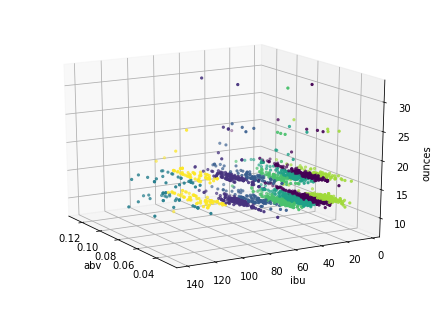

In [15]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=18, azim=150)

plt.cla()

ax.scatter(numerical_df['abv'],
           numerical_df['ibu'], 
           numerical_df['ounces'], 
           c=numerical_df.cluster, 
           s=5)

ax.set_xlabel('abv')
ax.set_ylabel('ibu')
ax.set_zlabel('ounces')
plt.show()


Text(0,0.5,'ibu')

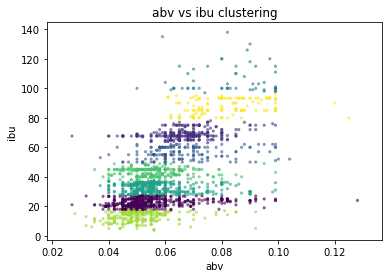

In [16]:
plt.scatter(numerical_df['abv'], 
            numerical_df['ibu'], 
            s=5, 
            c=numerical_df.cluster, 
            alpha=0.5)
plt.title("abv vs ibu clustering")
plt.xlabel("abv")
plt.ylabel("ibu")

Text(0,0.5,'ounces')

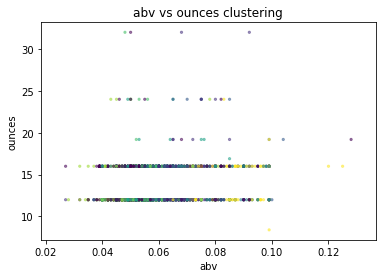

In [17]:
plt.scatter(numerical_df['abv'], 
            numerical_df['ounces'], 
            s=5, 
            c=numerical_df.cluster, 
            alpha=0.5)
plt.title("abv vs ounces clustering")
plt.xlabel("abv")
plt.ylabel("ounces")

Text(0,0.5,'ounces')

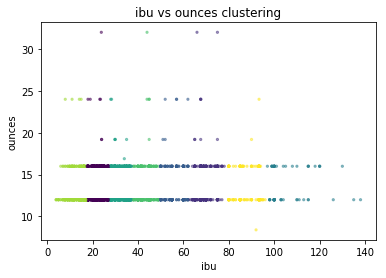

In [18]:
plt.scatter(numerical_df['ibu'], 
            numerical_df['ounces'], 
            s=5, 
            c=numerical_df.cluster, 
            alpha=0.5)
plt.title("ibu vs ounces clustering")
plt.xlabel("ibu")
plt.ylabel("ounces")

In [20]:
# normalize the data 
# scale all values for clustering.
scaler = StandardScaler()
scaled_values = scaler.fit_transform(features)
scaled_beer_features = pd.DataFrame(scaled_values)
scaled_beer_features.column = ['abv','ibu','ounces']
scaled_beer_features = scaled_beer_features.rename(columns={0:'abv',1:'ibu',2:'ounces'})
print(scaled_beer_features.head(20))

         abv       ibu    ounces
0  -0.723979 -0.593391 -0.675788
1   0.466453  0.169443 -0.675788
2   0.838463  1.121075 -0.675788
3   2.252101  2.198177 -0.675788
4   1.136071  1.121075 -0.675788
5   1.284875 -0.537161 -0.675788
6  -1.095989  0.169443 -0.675788
7   0.392051 -0.376462 -0.675788
8  -0.351969  0.169443 -0.675788
9   1.954493  2.198177 -0.675788
10  0.912865 -0.524564 -0.675788
11  0.987267 -0.524564 -0.675788
12  0.689659 -0.524564 -0.675788
13  1.880091  0.675122 -0.675788
14  0.094443  0.800925 -0.675788
15  1.656885  0.549319 -0.675788
16  1.656885 -0.729678 -0.675788
17  2.921719  2.142824 -2.230461
18  1.433679  0.171910 -0.675788
19  1.433679  0.017277 -0.675788


/Users/Carancho/miniconda3/envs/ml_class_work/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


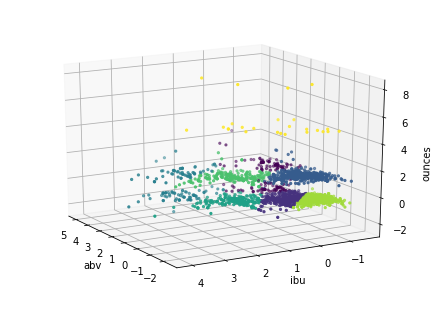

In [21]:
# get kmeans clusters.
km.fit(scaled_beer_features)
scaled_clusters = km.predict(scaled_beer_features)
scaled_beer_features['kmeans_cluster'] = scaled_clusters.copy()

fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=18, azim=150)

plt.cla()

ax.scatter(scaled_beer_features['abv'],
           scaled_beer_features['ibu'], 
           scaled_beer_features['ounces'], 
           c=scaled_beer_features.kmeans_cluster, 
           s=5)

ax.set_xlabel('abv')
ax.set_ylabel('ibu')
ax.set_zlabel('ounces')
plt.show()

In [22]:
metrics.homogeneity_score(beer_labels, scaled_clusters)

0.21773268370467797

Text(0,0.5,'ibu')

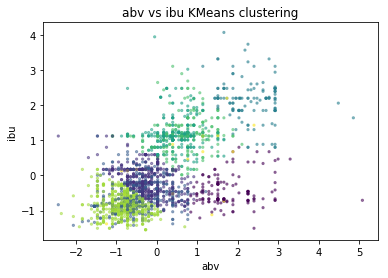

In [23]:
plt.scatter(scaled_beer_features['abv'], 
            scaled_beer_features['ibu'], 
            s=5, 
            c=scaled_beer_features.kmeans_cluster, 
            alpha=0.5)
plt.title("abv vs ibu KMeans clustering")
plt.xlabel("abv")
plt.ylabel("ibu")

Text(0,0.5,'ounces')

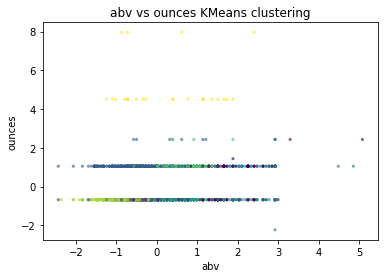

In [24]:
plt.scatter(scaled_beer_features['abv'], 
            scaled_beer_features['ounces'], 
            s=5, 
            c=scaled_beer_features.kmeans_cluster, 
            alpha=0.5)
plt.title("abv vs ounces KMeans clustering")
plt.xlabel("abv")
plt.ylabel("ounces")

Text(0,0.5,'ounces')

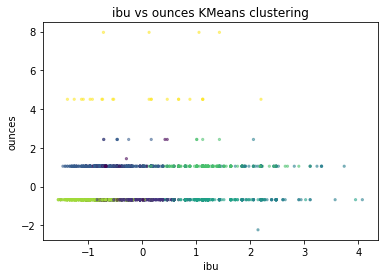

In [25]:
plt.scatter(scaled_beer_features['ibu'], 
            scaled_beer_features['ounces'], 
            s=5, 
            c=scaled_beer_features.kmeans_cluster, 
            alpha=0.5)
plt.title("ibu vs ounces KMeans clustering")
plt.xlabel("ibu")
plt.ylabel("ounces")

## DBSCAN Clustering and Graphing in 2D and 3D

In [26]:
# Cluster using DBSCAN.
dbscan = DBSCAN(eps=.5)
dbscan_cluster = dbscan.fit_predict(scaled_beer_features[['abv','ibu', 'ounces']])
scaled_beer_features['dbscan_cluster'] = dbscan_cluster.copy()
print(scaled_beer_features.head())

        abv       ibu    ounces  kmeans_cluster  dbscan_cluster
0 -0.723979 -0.593391 -0.675788               6               0
1  0.466453  0.169443 -0.675788               1               0
2  0.838463  1.121075 -0.675788               4               0
3  2.252101  2.198177 -0.675788               3               0
4  1.136071  1.121075 -0.675788               4               0


In [27]:
metrics.homogeneity_score(beer_labels, dbscan_cluster)

0.020337304064643697

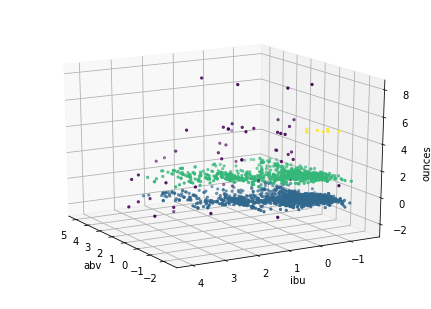

In [28]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=18, azim=150)

plt.cla()

ax.scatter(scaled_beer_features['abv'],
           scaled_beer_features['ibu'], 
           scaled_beer_features['ounces'], 
           c=scaled_beer_features.dbscan_cluster, 
           s=5)

ax.set_xlabel('abv')
ax.set_ylabel('ibu')
ax.set_zlabel('ounces')
plt.show()

Text(0,0.5,'ibu')

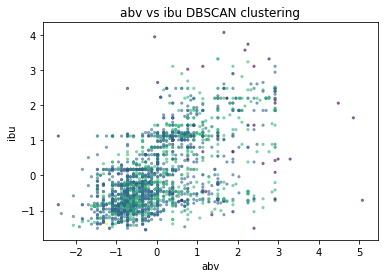

In [29]:
plt.scatter(scaled_beer_features['abv'], 
            scaled_beer_features['ibu'], 
            s=5, 
            c=scaled_beer_features.dbscan_cluster, 
            alpha=0.5)
plt.title("abv vs ibu DBSCAN clustering")
plt.xlabel("abv")
plt.ylabel("ibu")

Text(0,0.5,'ounces')

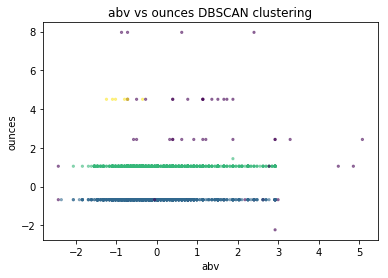

In [30]:
plt.scatter(scaled_beer_features['abv'], 
            scaled_beer_features['ounces'], 
            s=5, 
            c=scaled_beer_features.dbscan_cluster, 
            alpha=0.5)
plt.title("abv vs ounces DBSCAN clustering")
plt.xlabel("abv")
plt.ylabel("ounces")

Text(0,0.5,'ounces')

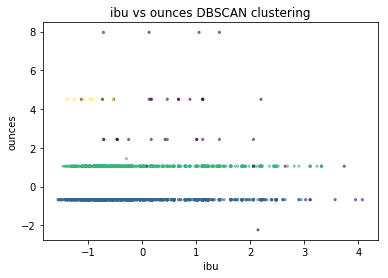

In [31]:
plt.scatter(scaled_beer_features['ibu'], 
            scaled_beer_features['ounces'], 
            s=5, 
            c=scaled_beer_features.dbscan_cluster, 
            alpha=0.5)
plt.title("ibu vs ounces DBSCAN clustering")
plt.xlabel("ibu")
plt.ylabel("ounces")

## PCA

In [32]:
pca = PCA(n_components=2)
X_r = pca.fit(scaled_beer_features).transform(scaled_beer_features)
pca_df = pd.DataFrame(X_r)
pca_df['style'] = beer_style
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(scaled_beer_features, target_styles).transform(scaled_beer_features)
lda_df = pd.DataFrame(X_r2)

NameError: name 'target_styles' is not defined

In [33]:
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.58329667 0.20850056]


In [34]:
pca_df.head()

,0,1,style
0,-2.818627,-0.686346,American Pale Lager
1,2.314626,-0.121596,American Pale Ale (APA)
2,-0.544530,1.223370,American IPA
3,0.699529,2.743023,American Double / Imperial IPA
4,-0.497882,1.417579,American IPA


In [35]:
len(beer_labels.unique())

90

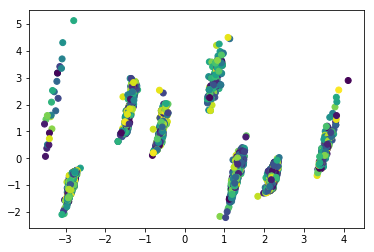

In [36]:
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=np.random.rand(2353), label = beer_labels)

## Note
You may use any for both parts 1 and 2, I only recommend using the data I used in the Lesson for part 1. I've included several new datasets in the `data/` folder, such as `beers.csv`, `snow_tweets.csv`, `data/USCensus1990.data.txt.gz`. You do not need to unzip or ungzip any data files. Pandas can open these files on its own.